# Covid-19 infección en Ecuador. Modelos probabilisticos
Implementacion de un modelo probabilistico de infección por el virus Covid-19

Se realiza un análisis probabilistico simple del crecimiento de la infección en Python y el modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de probabilidad.

In [416]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline


In [417]:
# Actualizar los datos (URL)
url = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
df = pd.read_csv(url)
df

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2020-01-03,17,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2020-04-20,74142,88.0,14.0,94.0,9.0,0.0,0.0,0.0,102.0,...,24601,0.0,11.0,70.0,0.0,29.0,0.0,0.0,4.0,0.0
112,2020-04-21,77274,35.0,22.0,89.0,4.0,0.0,0.0,0.0,90.0,...,28065,1.0,7.0,92.0,1.0,0.0,0.0,0.0,4.0,0.0
113,2020-04-22,87387,61.0,25.0,93.0,0.0,0.0,0.0,1.0,112.0,...,37289,0.0,8.0,35.0,0.0,29.0,0.0,0.0,0.0,3.0
114,2020-04-23,67629,84.0,25.0,99.0,6.0,0.0,0.0,0.0,144.0,...,17588,0.0,6.0,24.0,0.0,3.0,0.0,0.0,9.0,0.0


Imprimos los resultados y agregamos el numero del dia


In [418]:
df = df.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

,date,Ecuador
0,-1,0.0
1,0,0.0
2,1,0.0
3,2,0.0
4,3,0.0
...,...,...
111,110,446.0
112,111,660.0
113,112,270.0
114,113,452.0


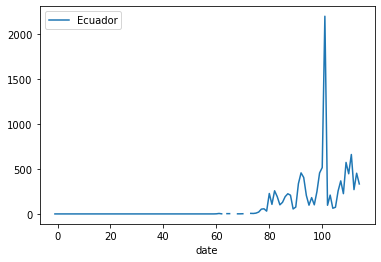

In [419]:
df.plot(x ='date', y='Ecuador')

Ahora podemos analizar un modelo probabilisto para el examen.

## El modelo basado en probabilidad

Para realizar un estimacion del factor de crecimiento de los casos de Covid 19 en Ecuador calculamos la mediana, con esto obtenemo el valor medio de crecimiento de un conjunto de datos, con esto podemos obtener un factor de crecimiento o taza de crecimiento de los nuevos casos.



In [420]:
filtro = df["Ecuador"][61:] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)


155.0
223.66


De la ecuación de la recta y = mX + b nuestra pendiente «m» es el coeficiente y el término independiente «b»


In [421]:
#Vamos a comprobar:
# según la media y la mediana podemos obtener la taza de crecieminto y predicir su comportamiento.
# Cargamos los datos de total de casos
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
y = list(df_t.iloc [:, 1]) # Total casos
x = list(df_t.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

11338


Dia  65
Dia  65


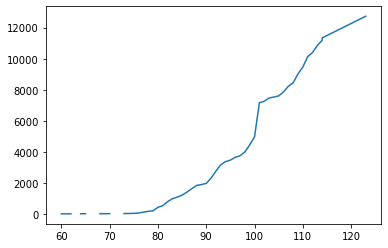

In [422]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a 10 dias.
xn3=np.zeros(len(x[61:]))
yn3=np.zeros(len(y[61:]))
xn3= x[61:]
yn3= y[61:]

xn=np.zeros(len(x[61:]))
yn=np.zeros(len(y[61:]))
xn= x[61:]
yn= y[61:]

for i in range(x[-1], x[-1]+10):
    x.append(i)
    y.append(int(y[-1] + mediana))
print("Dia ",len(x[61:]))
print("Dia ",len(y[61:]))
plt.plot(x[61:], y[61:])
plt.show()

In [423]:
yn[3]=0
yn[6]=0
yn[7]=0
yn[11]=0
yn[12]=0

yn3[3]=0
yn3[6]=0
yn3[7]=0
yn3[11]=0
yn3[12]=0

# Practica

1. Comparar el modelo de predicion matematico vs probabilidad.


## Modelo Polinomial

PREDICCION 1 SEMANA
11305.344209516275


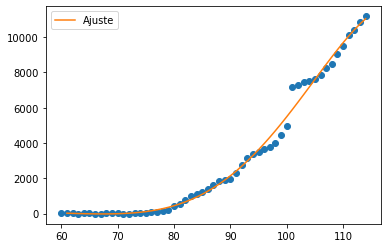

In [424]:
y = list(df_t.iloc [:, 1]) # Total casos
x = list(df_t.iloc [:, 0]) # Dias

muestra = {}
for dias in range(1,6):
  z = np.polyfit(xn, yn, dias, full=True)
  muestra[dias] = z

plt.plot(xn, yn, 'o')
xp=np.array(range(61,115))
for dias, contagio in muestra.items():
  coefs, error, *_ = contagio
  p = np.poly1d(coefs)
print("PREDICCION 1 SEMANA")
print(p(115))
plt.plot(xp, p(xp), "-", label="Ajuste"  )
plt.legend()

## Modelo SIR
2. Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.


In [433]:
xn2=np.zeros(len(x[61:]))
yn2=np.zeros(len(y[61:]))
xn2= xn[61:]
yn2= yn[61:]
for i in range(xn[-1], xn[-1]+7):
    xn.append(i)
    yn.append(int(yn[-1] + mediana))
print("Dia ",len(xn[61:]))
print("Dia ",len(yn[61:]))

Dia  57
Dia  57


Modelo SIR


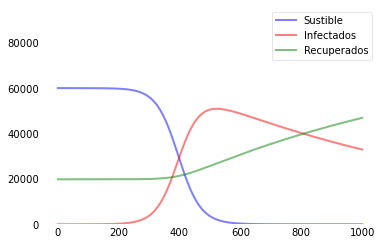

In [434]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from IPython.display import display
from scipy.integrate import odeint



def loss(point, data, rf, s_0, i_0, r_0):
     
    size = len(data)
    beta, gamma = point
    
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - rf)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

data = yn2
 
# Total de la poblacion
N =80000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 =yn2[len(yn2)-1]
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0

optimal = minimize(loss, [0.0001, 0.0001], args=(data, yn2, S0, I0, R0), method='L-BFGS-B', bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])
beta, gamma = optimal.x

beta *= 10000
gamma *= 100000 

#print('Beta: ' )
#print(beta)
#print('Gamma: ')
#print(gamma)
#print("R0: ")
#print(beta/gamma)

t = np.linspace(0, 1000, 1000)

# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T


fig = plt.figure(facecolor='w')

ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
print("Modelo SIR")
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


## Una semana atras

3. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.


Datos Reales


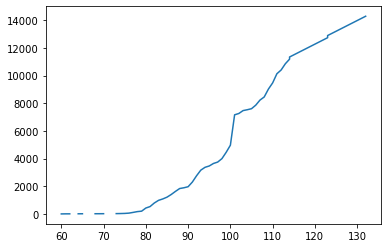

Predicion:  8225.0
Reales:  11183.0
Media:  3143.7454545454543
Mediana:  1627.0
Datos Predic


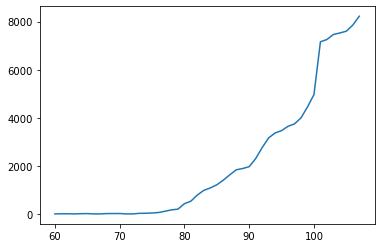

Modelo Polinomial


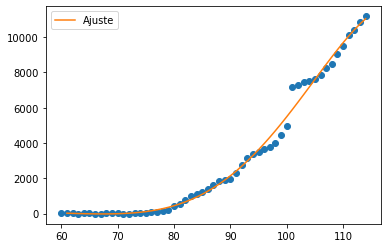

In [436]:
import statistics as stats

print("Datos Reales")
xn=np.zeros(len(x[61:]))
yn=np.zeros(len(y[61:]))
xn= x[61:]
yn= y[61:]

for i in range(x[-1], x[-1]+10):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x[61:], y[61:])
plt.show()



xtr= np.zeros(len(xn3)-7)
ytr= np.zeros(len(yn3)-7)
xts=np.zeros(7)
yts=np.zeros(7)
for i in range(len(xn3)-7):
    xtr[i]=xn3[i]
    ytr[i]=yn3[i]

for i in range(7):
    xts[i]=xn3[48+i]
    yts[i]=yn3[48+i]

xtrn= np.zeros(len(xtr))
ytrn= np.zeros(len(ytr))
xtrn= xtr
ytrn= ytr
print("Predicion: ",ytr[-1])
print("Reales: ",yts[-1])


md = stats.mean(yn3)
mdn = stats.median(yn3)
xpt=np.zeros(len(xtr)+7)
ypt=np.zeros(len(ytr)+7)
print("Media: ",md)
print("Mediana: ",mdn)



for i in range (len(xtr)):
    xpt[1]=60+1
    if i <= 47:
        ypt[i]=ytr[i]
    else:
        ypt[i]=ypt[i-1]+mdn
        
print ("Datos Predic")
#for i in range (7):
    #print (ytr[i])

plt.plot(xtr,ytr)
plt.show()



muestra = {}
for dias in range(1,6):
  z = np.polyfit(xn3, yn3, dias, full=True)
  muestra[dias] = z

plt.plot(xn3, yn3, 'o')
xp=np.array(range(61,115))
for dias, contagio in muestra.items():
  coefs, error, *_ = contagio
  p = np.poly1d(coefs)
print("Modelo Polinomial")
plt.plot(xp, p(xp), "-", label="Ajuste"  )
plt.legend()
    

## Analisis

- Según lo visto en las gráficas se pude decir que el modelo de probabilidad acierta en un porcentaje mayor al del polinomial, aunque no tiene mucho margen de error se podría decir que se confía mejor el modelo de probabilidad.

## Conclusiones

- En conclusión teniendo en cuenta lo analizado, se pude decir que podremos usar un modelo probabilístico en caso de querer mayor eficacia en los datos que se vaya a analizar pero si se quiere un aproximado bastante bueno se pude seguir usando el modelo polinomial para le análisis de datos.

## Criterio personal (politico, economico y  social de la situacion)

- La situación del país se torna cada vez más grabe, ya que actualmente no se conoce ni una cifra cercana de los casos que tenemos en el ecuador, la economía cada vez va decayendo mientras el gobierno se centra en ocultar las verdad par aquedar bien el país cada vez va empeorando, aparte la sociedad no colabora en algunas partes específicamente en al región costa donde se tiene el mayor porcentaje de casos confirmados.



# Referencias

- https://www.researchgate.net/publication/340092755_Infeccion_del_Covid-19_en_Colombia_Una_comparacion_de_modelos_logisticos_y_exponenciales_aplicados_a_la_infeccion_por_el_virus_en_Colombia

- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/